#### Perceptron classifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """Perceptron classifier
    
    Parameters
    ----------
    _learning_rate : float
        Learning rate of classifier
    _iter : int
        number of time to run the classifier
    """
    
    
    def __init__(self,learning_rate = 0.01, n_iter = 50):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def fit(self,X,Y):
        """Fitting the learning data

        Parameters
        ----------
        X : ndarray, shape = (n_samples,n_features)
            training data where n_samples is number of samples
            to train the data, n_features is number of features
        Y : ndarray, shape = (n_samples)
            training data target output, n_samples is number of samples
        """
        
        self.weights = np.random.rand(X.shape[1] + 1)
        self.errors = list()
        
        for _ in range(self.n_iter):
            n_errors = 0
            for data,target in zip(X,Y):
                correction = self.learning_rate * (target - self.predict(data))
                self.weights[1:] += correction * data
                self.weights[0] += correction
                if correction != 0.0:
                    n_errors += 1
            self.errors.append(n_errors)
        
        return self
    
    def predict(self,data):
        """calculate target variables according to the weights
        
        parameters
        ----------
        data : ndarray, shape = (n_features)
            sample data
        """
        
        dot_product = np.dot(data, self.weights[1:]) + self.weights[0]
        return (np.where(dot_product >= 0.0, 1, -1))

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


---

#### Reading data

In [3]:
df_iris = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


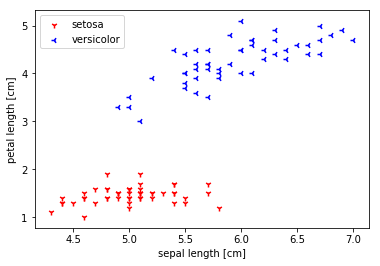

In [6]:
%matplotlib inline

y = df_iris.iloc[:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)

x = df_iris.iloc[:100,[0,2]].values

plt.scatter(x[:50,0],x[:50,1], color = 'red', marker = '1', label = 'setosa')
plt.scatter(x[50:,0],x[50:,1], color = 'blue', marker = '3', label = 'versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

----
#### Predicting using the perception classifier

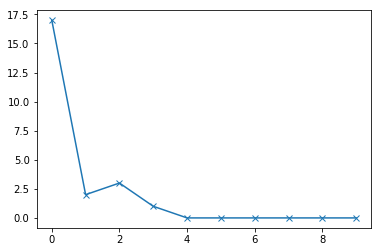

In [7]:
perc = Perceptron(learning_rate = 0.005, n_iter = 10)

perc.fit(x,y)

plt.plot(perc.errors, marker = "x")